# Interpolation

### Linear Interpolation

It is the simplest way to find the value of a function $f(x)$ in between two points $x\,=\, a$ and $x\, =\, b$ at which the values of the function are known. 

The idea here is to approximate the function by a straight line passing through $a$ and $b$. Then, it can be shown that the value of the function at a point $x$ in between $a$ and $b$ is 
$$
f(x)\, \simeq\, \frac{(b\,-\,x)\,f(a)\, +\, (x\, -\, a)\,f(b)}{b\,-\,a}.
$$
This is the formula for linear interpolation.

#### Accuracy of linear interpolation

To derive the error in the above formula, first expand f(a) and f(b) about x, i.e.

$$
f(a)\, =\, f(x)\, +\, (a\, -\, x)\, f'(x)\, +\, \frac{1}{2}\,(a\, -\, x)^2\,f''(x),\\
f(b)\, =\, f(x)\, +\, (b\, -\, x)\, f'(x)\, +\, \frac{1}{2}\,(b\, -\, x)^2\,f''(x).
$$
Substitute the above expressions in the estimate for $f(x)$, to obtain
$$
\frac{(b\,-\,x)\,f(a)\, +\, (x\, -\, a)\,f(b)}{b\,-\,a}\, =\, f(x)\, -\, \frac{1}{2}\,(a\, -\, x)\,(\, b\, -\, x)\, f''(x).
$$
Thus,
$$
f(x)\, =\, \frac{(b\,-\,x)\,f(a)\, +\, (x\, -\, a)\,f(b)}{b\,-\,a}\, +\, \frac{1}{2}\,(a\, -\, x)\,(\, b\, -\, x)\, f''(x).
$$

The second term on the right is the leading error in our estimate of $f(x)$.

### Splines

If we know the value of the function at more than two points, one way to improve the interpolation is to use higher order method. Such higher-order methods are known as *Lagrange interpolation methods*. 

However, a higher order polynomial though might fit the given data exactly, at in between points there will be lot of wiggles which may lead to a bad interpolation. Hence, it is better to piecewise fit many low order polynomials to the data. In order to obtain a smooth slope everywhere one should also demand that the derivatives are continuous. In a **cubic spline**, which is the most popular spline, the piecewise polynomial is of cubic order and we demand that the resulting polynomials and their first and second derivatives are continuous in the required region. 

For more information on splines, see chapter 5 of S. S. Sastry's book.

### [Scipy](https://www.scipy.org/)

> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:

1. NumPy

2. SciPy library

3. Matplotlib

4. IPython

5. Sympy

6. pandas


Very useful, explore!

### Interpolation using Scipy

Scipy provides lot of functions to implement interpolation. For a list of all the functions and their documentation, see this [link](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

Tutorial can be found [here](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)


In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create some data
x = np.linspace(0, 4, 12)
y = np.cos((x**2.)/3.)
print x,y

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [ 1.          0.99902876  0.98449787  0.92234329  0.76145979  0.4518767
 -0.01597985 -0.55551591 -0.94902885 -0.9095255  -0.29998362  0.58180349]


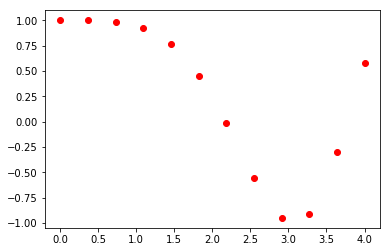

In [4]:
# Visualize the data
plt.plot(x, y, 'ro')
plt.show()

In [6]:
# Create interpolating function using interp1d
f1 = interpolate.interp1d(x, y, kind='linear') # to understand the "kind = linear" part, see below.
f2 = interpolate.interp1d(x, y, kind='cubic')

>>
kind : str or int, optional

>>
Specifies the kind of interpolation as a string (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point) or as an integer specifying the order of the spline interpolator to use. Default is ‘linear



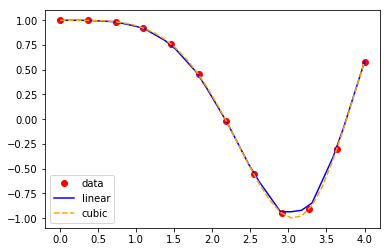

In [19]:
# Visualize how good is the interpolation
xnew = np.linspace(0.,4.,30)# I have more points here!
plt.plot(x, y, 'ro')
plt.plot(xnew, f1(xnew), linestyle='-', color='b')
plt.plot(xnew, f2(xnew), linestyle='--',color='orange')
plt.legend(['data','linear','cubic'],loc='best')

In [20]:
x = np.linspace(0, 4, 30)
y = np.cos((x**2.)/3.)+0.1*np.random.rand(30)

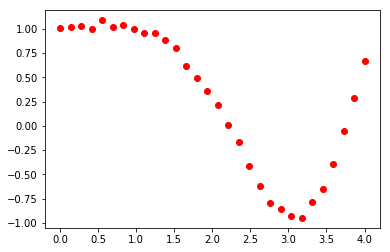

In [21]:
plt.plot(x,y,'ro')

In [22]:
f1 = interpolate.interp1d(x, y, kind='linear') # to understand the "kind = linear" part, see below.
f2 = interpolate.interp1d(x, y, kind='cubic')

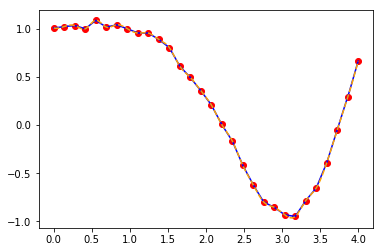

In [23]:
# Visualize how good is the interpolation
xnew = np.linspace(0.,4.,1000)
plt.plot(x, y, 'ro')
plt.plot(xnew, f1(xnew), linestyle='-', color='b')
plt.plot(xnew, f2(xnew), linestyle='--',color='orange')

In [24]:
# Can we do better

from scipy.interpolate import UnivariateSpline

In [25]:
spline = UnivariateSpline(x,y)

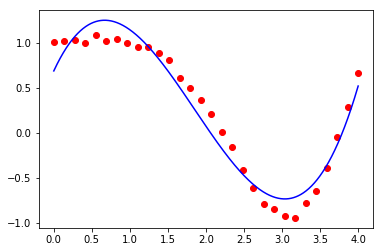

In [26]:
# Visualize how good is the interpolation
xnew = np.linspace(0.,4.,1000)
plt.plot(x, y, 'ro')
plt.plot(xnew, spline(xnew), linestyle='-',color='b')

In [31]:
spline.set_smoothing_factor(0.1)

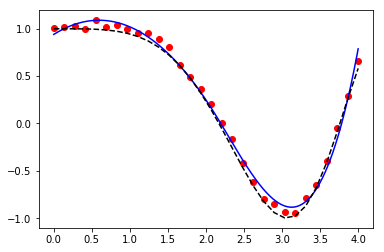

In [32]:
plt.plot(x, y, 'ro')
plt.plot(xnew, spline(xnew), linestyle='-',color='b')
plt.plot(x, np.cos((x**2.)/3.),'k--')